1916 to 2016 movies... 5k datas
THIS WILL BE MERGED WITH DATASET IN MOVIE2
....English movies after 1970 are selected

In [32]:
import pandas as pd
import numpy as np
import sklearn 
import warnings
warnings.filterwarnings('ignore')

In [33]:
movie_meta  =pd.read_csv('movie_metadata.csv')
movie_meta.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [34]:
movie_meta.shape

(5043, 28)

In [35]:
movie_meta.head(4)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000


### Selecting the movies of USA & UK only.

In [36]:
movie_meta = movie_meta[movie_meta.country.isin(['USA','UK'])]

In [37]:
movie_meta.shape

(4255, 28)

### Selecting movies made after 1960

In [38]:
movie_meta = movie_meta[movie_meta['title_year'] > 1970]

In [39]:
movie_meta.shape

(4025, 28)

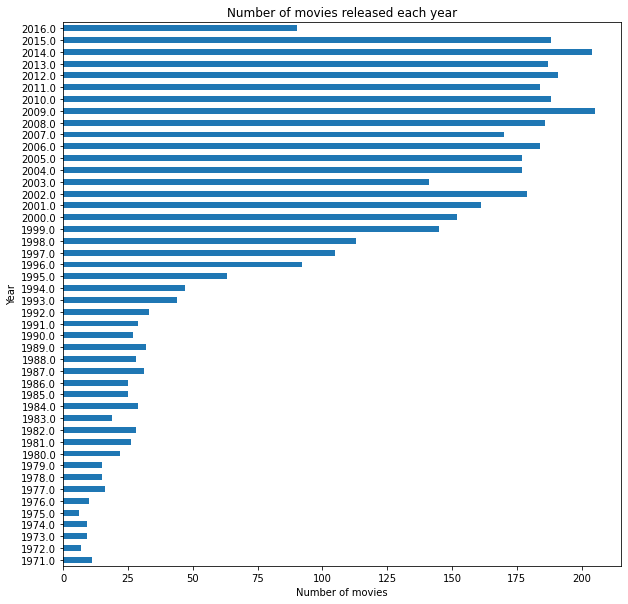

In [40]:
import matplotlib.pyplot as plt
plt.title('Number of movies released each year')
plt.xlabel('Number of movies')
plt.ylabel('Year')
movie_meta.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(10,10))
plt.show()

### Selcting Movies with duration more than 90 minutes

In [41]:
movie_meta.duration.describe()

count    4017.000000
mean      107.438387
std        21.208020
min         7.000000
25%        94.000000
50%       103.000000
75%       117.000000
max       330.000000
Name: duration, dtype: float64

In [42]:
movie_meta = movie_meta[movie_meta['duration'] >= 74]
movie_meta[['movie_title','duration','genres','title_year']]

,movie_title,duration,genres,title_year
0,Avatar,178.0,Action|Adventure|Fantasy|Sci-Fi,2009.0
1,Pirates of the Caribbean: At World's End,169.0,Action|Adventure|Fantasy,2007.0
2,Spectre,148.0,Action|Adventure|Thriller,2015.0
3,The Dark Knight Rises,164.0,Action|Thriller,2012.0
5,John Carter,132.0,Action|Adventure|Sci-Fi,2012.0
...,...,...,...,...
5036,The Mongol King,84.0,Crime|Drama,2005.0
5037,Newlyweds,95.0,Comedy|Drama,2011.0
5040,A Plague So Pleasant,76.0,Drama|Horror|Thriller,2013.0
5041,Shanghai Calling,100.0,Comedy|Drama|Romance,2012.0


In [43]:
movie_meta.shape

(3988, 28)

In [44]:
list(movie_meta.movie_title)

['Avatar\xa0',
 "Pirates of the Caribbean: At World's End\xa0",
 'Spectre\xa0',
 'The Dark Knight Rises\xa0',
 'John Carter\xa0',
 'Spider-Man 3\xa0',
 'Tangled\xa0',
 'Avengers: Age of Ultron\xa0',
 'Harry Potter and the Half-Blood Prince\xa0',
 'Batman v Superman: Dawn of Justice\xa0',
 'Superman Returns\xa0',
 'Quantum of Solace\xa0',
 "Pirates of the Caribbean: Dead Man's Chest\xa0",
 'The Lone Ranger\xa0',
 'Man of Steel\xa0',
 'The Chronicles of Narnia: Prince Caspian\xa0',
 'The Avengers\xa0',
 'Pirates of the Caribbean: On Stranger Tides\xa0',
 'Men in Black 3\xa0',
 'The Amazing Spider-Man\xa0',
 'Robin Hood\xa0',
 'The Hobbit: The Desolation of Smaug\xa0',
 'The Golden Compass\xa0',
 'Titanic\xa0',
 'Captain America: Civil War\xa0',
 'Battleship\xa0',
 'Jurassic World\xa0',
 'Skyfall\xa0',
 'Spider-Man 2\xa0',
 'Iron Man 3\xa0',
 'Alice in Wonderland\xa0',
 'Monsters University\xa0',
 'Transformers: Revenge of the Fallen\xa0',
 'Transformers: Age of Extinction\xa0',
 'Oz the 

In [45]:
data = movie_meta[['movie_title','director_name','actor_1_name','actor_2_name','actor_3_name','genres','title_year']]
data.head()

,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,genres,title_year
0,Avatar,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,2009.0
1,Pirates of the Caribbean: At World's End,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,2007.0
2,Spectre,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,2015.0
3,The Dark Knight Rises,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,2012.0
5,John Carter,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,2012.0


In [46]:
data.isna().sum()

movie_title      0
director_name    0
actor_1_name     4
actor_2_name     6
actor_3_name     8
genres           0
title_year       0
dtype: int64

In [47]:
data.fillna('unknown',inplace=True)
data.isna().sum()

movie_title      0
director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
title_year       0
dtype: int64

In [48]:
cols=['movie_title','director_name','actor_1_name','actor_2_name','actor_3_name','genres']
data[cols] = data[cols].apply(lambda x : x.str.lower())
data.head(4)

,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,genres,title_year
0,avatar,james cameron,cch pounder,joel david moore,wes studi,action|adventure|fantasy|sci-fi,2009.0
1,pirates of the caribbean: at world's end,gore verbinski,johnny depp,orlando bloom,jack davenport,action|adventure|fantasy,2007.0
2,spectre,sam mendes,christoph waltz,rory kinnear,stephanie sigman,action|adventure|thriller,2015.0
3,the dark knight rises,christopher nolan,tom hardy,christian bale,joseph gordon-levitt,action|thriller,2012.0


In [49]:
data.genres

0       action|adventure|fantasy|sci-fi
1              action|adventure|fantasy
2             action|adventure|thriller
3                       action|thriller
5               action|adventure|sci-fi
                     ...               
5036                        crime|drama
5037                       comedy|drama
5040              drama|horror|thriller
5041               comedy|drama|romance
5042                        documentary
Name: genres, Length: 3988, dtype: object

In [50]:
data.genres = data.apply(lambda x: x.genres.replace('|',' '),axis=1)

In [51]:
data.reset_index(inplace=True,drop=True)

In [52]:
# data

In [53]:
g = []
for i in data.genres:
    w = []
    w = i.split(' ')
    for j in w:
        if j not in g:
            g.append(j)
print(g)

['action', 'adventure', 'fantasy', 'sci-fi', 'thriller', 'romance', 'animation', 'comedy', 'family', 'musical', 'mystery', 'western', 'drama', 'history', 'sport', 'crime', 'horror', 'war', 'biography', 'music', 'documentary', 'news']


In [54]:
# index=-1
# for i in data.genres:
#     w=[]
#     w=i.split(' ')
#     index+=1
#     for j in w:
#         if j=='musical':
#             print(index,'-',data.movie_title[index])

<br>

In [55]:
data['movie_title'][2]

'spectre\xa0'

In [56]:
data['movie_title'] = data['movie_title'].apply(lambda x: x[:-1])

In [57]:
data['movie_title'][2]

'spectre'

<br>

In [58]:
# data['combined'] = data.actor_1_name + ' ' + data.actor_2_name + ' ' + data.actor_3_name + ' ' + data.genres

<br>

In [59]:
data.title_year = data.title_year.apply(lambda x: int(str(x).split('.')[0]))

In [60]:
data.to_csv('data.csv')

In [61]:
data

,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,genres,title_year
0,avatar,james cameron,cch pounder,joel david moore,wes studi,action adventure fantasy sci-fi,2009
1,pirates of the caribbean: at world's end,gore verbinski,johnny depp,orlando bloom,jack davenport,action adventure fantasy,2007
2,spectre,sam mendes,christoph waltz,rory kinnear,stephanie sigman,action adventure thriller,2015
3,the dark knight rises,christopher nolan,tom hardy,christian bale,joseph gordon-levitt,action thriller,2012
4,john carter,andrew stanton,daryl sabara,samantha morton,polly walker,action adventure sci-fi,2012
...,...,...,...,...,...,...,...
3983,the mongol king,anthony vallone,richard jewell,john considine,sara stepnicka,crime drama,2005
3984,newlyweds,edward burns,kerry bishé,caitlin fitzgerald,daniella pineda,comedy drama,2011
3985,a plague so pleasant,benjamin roberds,eva boehnke,maxwell moody,david chandler,drama horror thriller,2013
3986,shanghai calling,daniel hsia,alan ruck,daniel henney,eliza coupe,comedy drama romance,2012


In [62]:
data.shape

(3988, 7)